In [16]:
import dask
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../a_embarras')
from pylib.sk import legal_kvecs, Sk, shavg
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from dask.distributed import Client
client = Client('tcp://127.0.0.1:8786')
client

Client Scheduler: tcp://127.0.0.1:8786 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 24 Memory: 33.69 GB


In [18]:
fjson = '../a_embarras/serial/rs1.49T2000N2592-h2.json'
mdf = pd.read_json(fjson)

In [19]:
nx = 14
box = mdf.iloc[0]['box']
kvecs = legal_kvecs(nx, box)
nk = len(kvecs)

In [20]:
skl = []
sk2l = []
isk = 0
for label, row in mdf.iterrows():
    com = np.array(row['positions'])
    sk = dask.delayed(Sk)(kvecs, com)  # line 1
    skl.append(sk) 
    sk2l.append(sk**2)
skm = np.mean(skl, axis=0)
ske = (np.mean(sk2l, axis=0)-skm**2)**0.5/len(skl)**0.5
skm, ske = dask.compute(skm, ske)  # line 2

<ErrorbarContainer object of 3 artists>

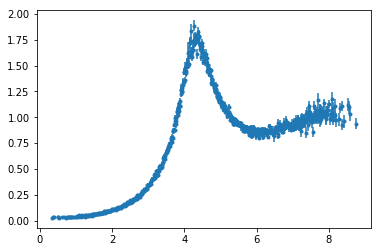

In [21]:
uk, uskm, uske = shavg(kvecs, skm, ske)
plt.errorbar(uk, uskm, uske, ls='', marker='.')

In [22]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/yyang173/.local/lib/python3.7/site-packages/distributed/utils.py", line 663, in log_errors
    yield
  File "/home/yyang173/.local/lib/python3.7/site-packages/distributed/client.py", line 1299, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/yyang173/.local/lib/python3.7/site-packages/distributed/utils.py", line 663, in log_errors
    yield
  File "/home/yyang173/.local/lib/python3.7/site-packages/distributed/client.py", line 1028, in _reconnect
    await self._close()
  File "/home/yyang173/.local/lib/python3.7/site-packages/distributed/client.py", line 1299, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.Cancelle